# Imports

In [3]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import os

# Processing chain

## RGB to grayscale

In [4]:
def to_grayscale_image(image):
    # Image copy
    new_image = np.zeros(shape=image.shape[:-1])
    # From-RGB-to-grayscale conversion weights
    r_w, g_w, b_w = 0.2125, 0.7154, 0.0721
    # Conversion
    for i in range(new_image.shape[0]):
        for j in range(new_image.shape[1]):
            pixel = image[i][j]
            new_image[i][j] = r_w * pixel[0] + g_w * pixel[1] + b_w * pixel[2]
    return new_image.astype(int)

## Image binarization

In [5]:
def to_binary_image(image):
    # To grayscale image
    image = to_grayscale_image(image)
    # Above this threshold, the pixel is white
    binarization_threshold = 120
    # Filtering black and white pixels
    binary_image = (image >= binarization_threshold).astype(int).copy()
    # Setting the corresponnding value to each pixel
    binary_image[binary_image == 1] = 255
    return binary_image

## Image cropping

This part is useful and interesting for certain extraction algorithms such as zoning to obtain more meaningful results. The aim of this is to keep only the interesting part of the image: the symbol area.

In [6]:
def crop_image(image):
    # Getting the black pixel positions
    black_pixel_positions = np.argwhere(image == 0)

    # Getting the minimum and maximum coordinates
    minimum_coordinates = black_pixel_positions.min(axis=0)
    maximum_coordinates = black_pixel_positions.max(axis=0)

    # Getting the cropped image
    cropped_image = image[minimum_coordinates[0]:maximum_coordinates[0] + 1, minimum_coordinates[1]:maximum_coordinates[1] + 1]

    return cropped_image

## Getting the final processed image

In [ ]:
def get_processed_image(image):
    # To binary image
    image = to_binary_image(image)
    # Cropping the image
    image = crop_image(image)
    return image

# Feature extraction

## First algorithm: zoning

In [7]:
# Getting characteristics
def get_characteristic_vector(image):
    square_size = 4
    # TODO

## Second algorithm

## Third algorithm

# Some tests

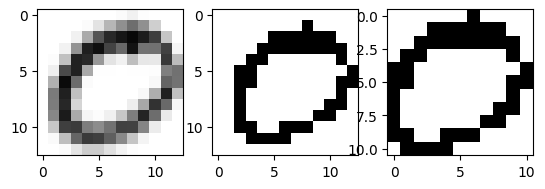

In [14]:
# Getting the initial image
image = io.imread("images/0_2.png")
# Showing it
plt.subplot(131)
plt.imshow(image, cmap='gray')
# To binary image
image = to_binary_image(image)
# Showing it
plt.subplot(132)
plt.imshow(image, cmap='gray')
# Cropping the image
image = crop_image(image)
# Showing it
plt.subplot(133)
plt.imshow(image, cmap='gray')